##Bring in libraries and dataframes and set indexes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [2]:
#Read in data calibrated VWC data
Data = pd.read_pickle('.\DataFrames\LysoEC_df')

## Set time slice to graph

In [3]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = Data.index.max()  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 6
#Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
EndDate

Timestamp('2017-10-10 07:45:00')

##Graph all sensors to check for anomolies

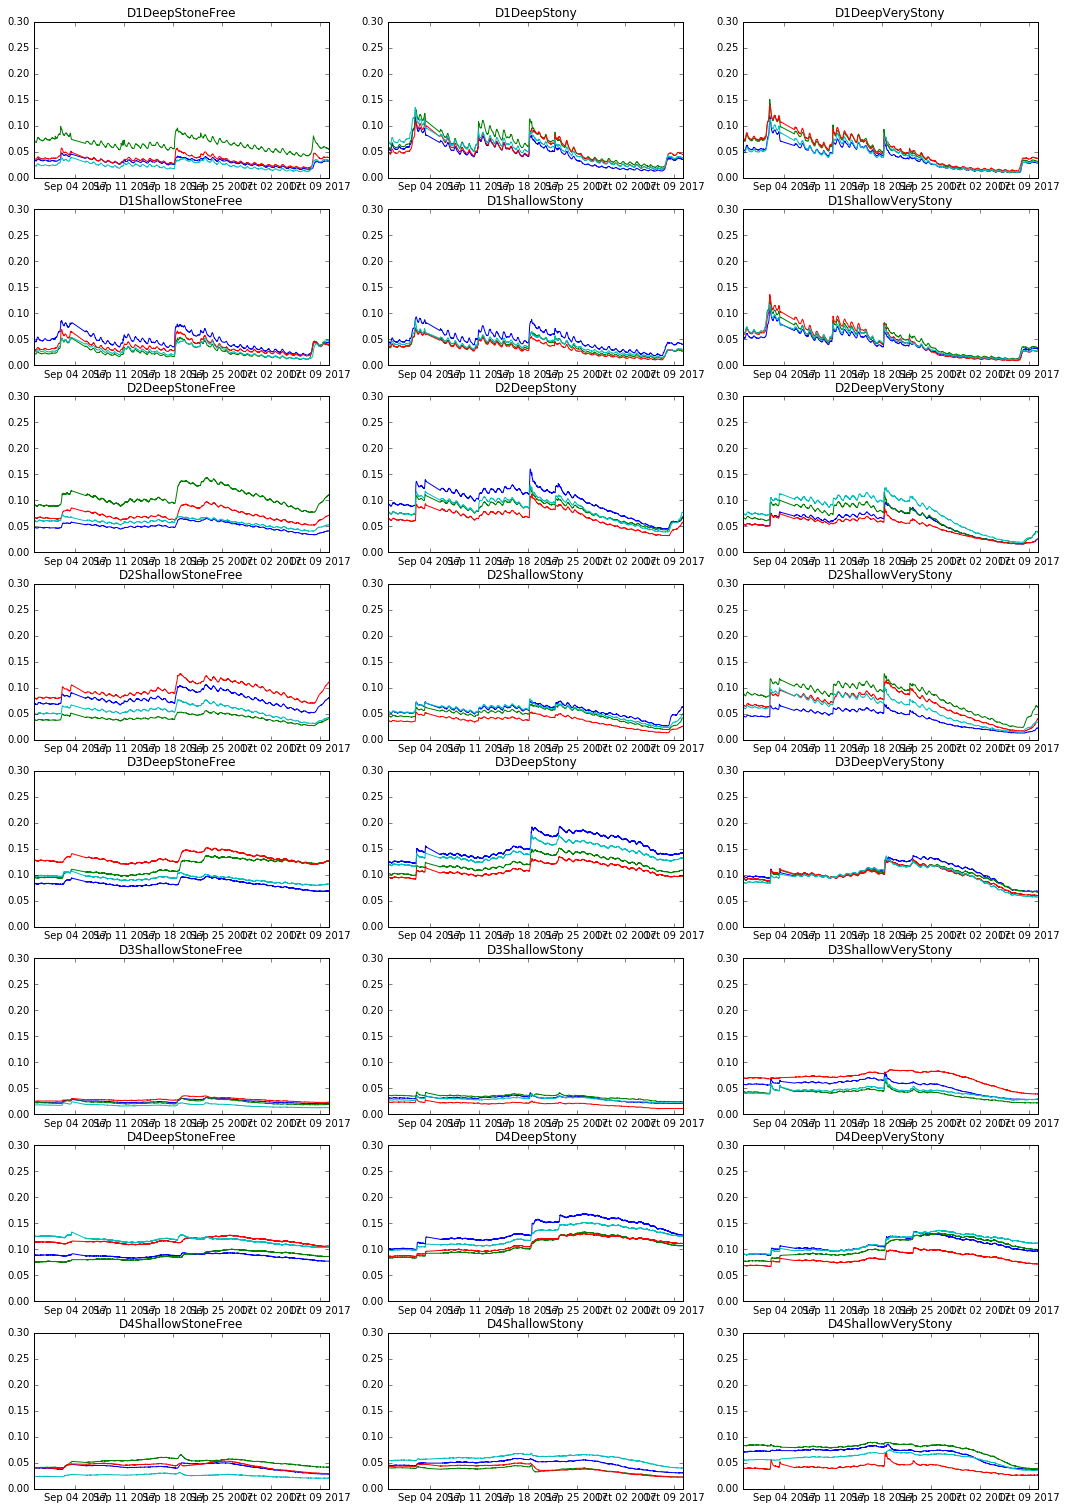

In [4]:
Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']

Graph = plt.figure(figsize=(18,80))

Pos = 1
for Depth in Depths:    
    for Grav in Gravels:
        for Ston in Stones:
            fig = Graph.add_subplot(24,3,Pos)
            plt.plot(Data.ix[StartDateString::,(Depth,Grav,Ston)].index,Data.ix[StartDateString::,(Depth,Grav,Ston)])
            Pos +=1
            plt.ylim(0,0.3)
            plt.title(Depth+Grav+Ston)

In [5]:

##Graph treatment means by layer

C:\Anaconda\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning:

The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.



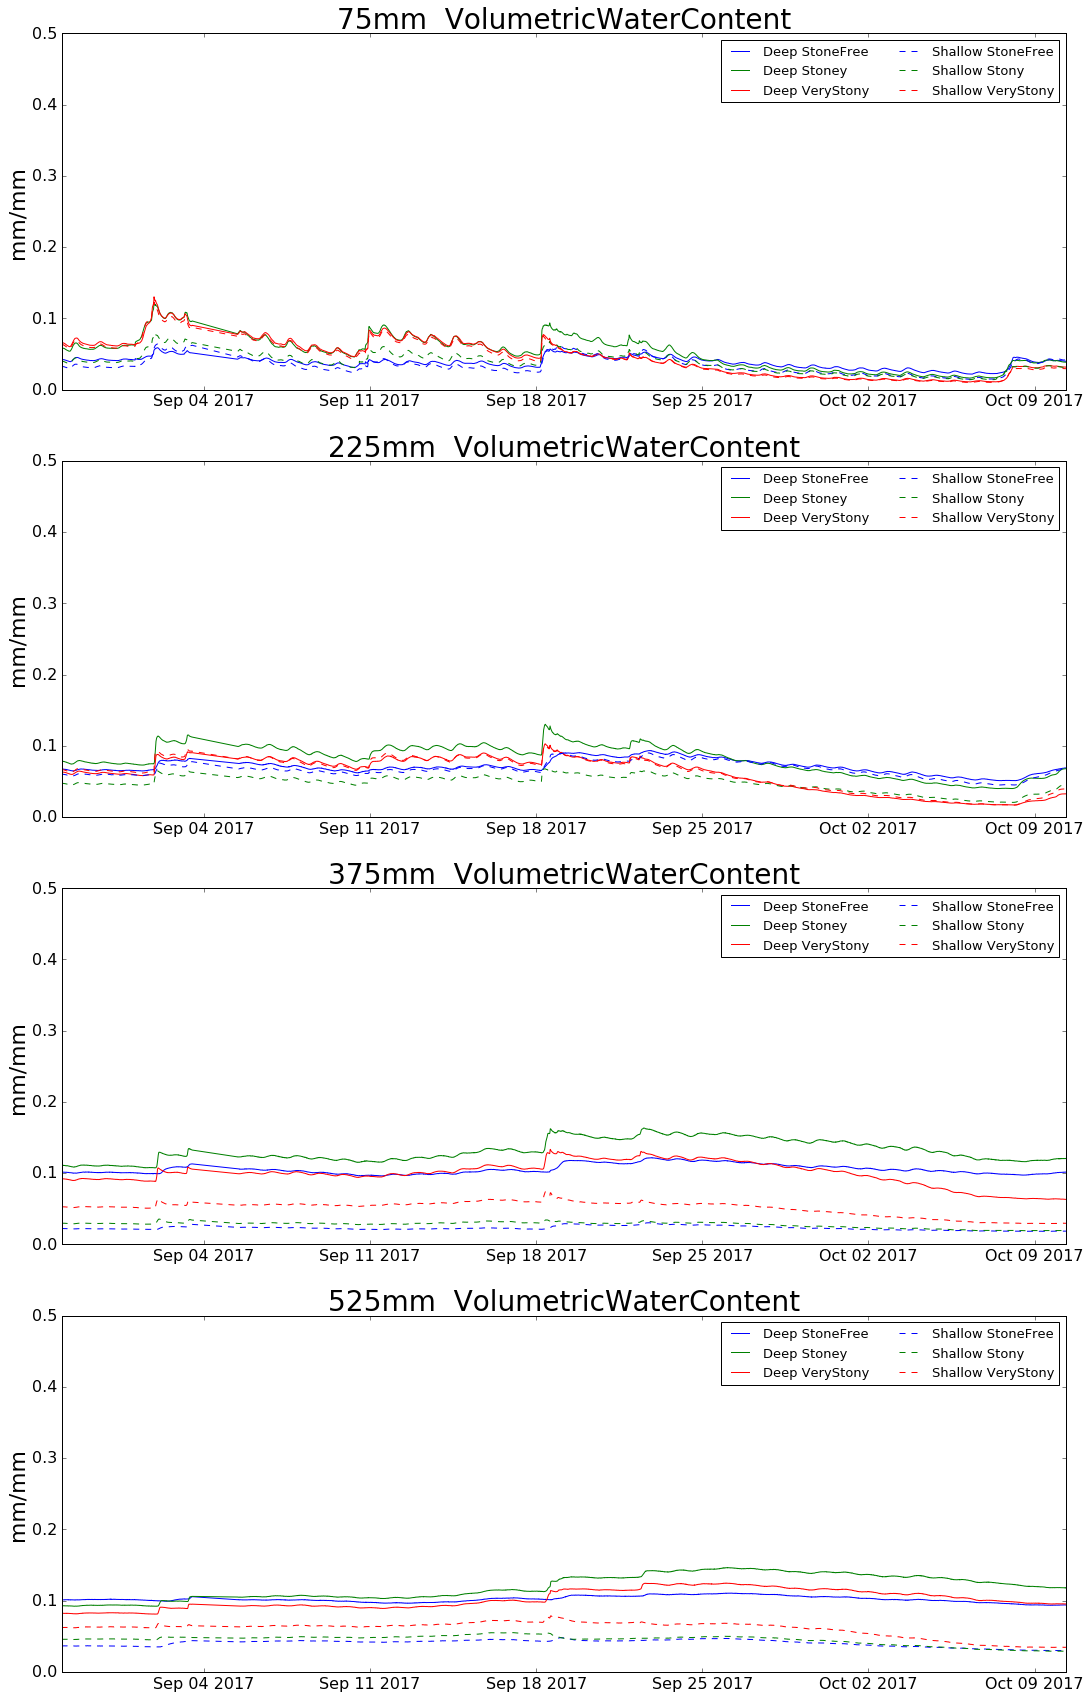

In [6]:
MeanLookSlice =  Data.ix['2014-11-05 08:00:00':].groupby(level=['Gravels','Stones','Depth'],axis=1).mean()

MeanLookSlice = MeanLookSlice.ix[StartDateString:]
MeanLookSlice.where(MeanLookSlice<0.7,np.nan,inplace=True)


Fig = plt.figure(figsize=(18, 60))

def MakePlot(Position, Depth, LayerThickness, Ymax, DepthLabel):
        Fig.add_subplot(8,1,Position, color_cycle=['b','g','r','b','g','r'])
        plt.title(DepthLabel + '  VolumetricWaterContent', fontsize=28);
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.StoneFree.ix[StartDateString:,Depth]*LayerThickness, '-', label='Deep StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.Stony.ix[StartDateString:,Depth]*LayerThickness, '-', label='Deep Stoney');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.VeryStony.ix[StartDateString:,Depth]*LayerThickness,'-', label='Deep VeryStony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.StoneFree.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.Stony.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow Stony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.VeryStony.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow VeryStony');
        plt.ylabel('mm/mm', fontsize=22);
        plt.tick_params(labelsize=16);
        plt.ylim(0,Ymax);
        plt.legend(loc=1, fontsize=13, ncol=2)
        return;

MakePlot(1,'D1',1,.5, '75mm')
MakePlot(2,'D2',1,.5, '225mm')
MakePlot(3,'D3',1,.5, '375mm')
MakePlot(4,'D4',1,.5, '525mm')

In [7]:
ProfileWater.ix['2014-11-05 08:00:00':,('Deep','StoneFree')]

NameError: name 'ProfileWater' is not defined

In [ ]:
from plotly.graph_objs import *

DeepStoneFree = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Deep','StoneFree')],
                        name = 'Deep StoneFree',
                        line = Line(color = 'blue', dash ='solid')
                       )

ShallowStoneFree = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Shallow','StoneFree')],
                           name = 'Shallow StoneFree',
                           line = Line(color = 'blue', dash ='dash')
                           )
DeepStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Deep','Stony')],
                        name = 'Deep Stony',
                        line = Line(color = 'green', dash ='solid')
                       )

ShallowStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Shallow','Stony')],
                           name = 'Shallow Stony',
                           line = Line(color = 'green', dash ='dash')
                           )
DeepVeryStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Deep','VeryStony')],
                        name = 'Deep VeryStony',
                        line = Line(color = 'red', dash ='solid')
                       )

ShallowVeryStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Shallow','VeryStony')],
                           name = 'Shallow VeryStony',
                           line = Line(color = 'red', dash ='dash')
                           )

data = Data([DeepStoneFree, ShallowStoneFree, DeepStony, ShallowStony, DeepVeryStony, ShallowVeryStony])

py.iplot(data, filename = 'basic-line')

In [ ]:
py.sign_in(username='HamishBrown',
                         api_key='e7di0t5cxu')

In [ ]:
#!gist -p -d "Setting up Soil summary for Export" SoilWaterAnalysis.ipynb

In [ ]:
#!gist -u https://gist.github.com/604c4dfd746733297790 SoilWaterAnalysis.ipynb